## 0. Import useful tools

In [1]:
import os, imars3d, numpy as np

In [2]:
# %matplotlib notebook
%matplotlib inline
from matplotlib import pyplot as plt

## 1. Define data paths

In [3]:
iptsdir = "/HFIR/CG1DImaging/IPTS-16040"

In [28]:
# path to the directory with ct, ob, and df data files or subdirs
datadir = os.path.join(iptsdir,"raw/")

In [5]:
# path to save output results (reconstructed slices)
outdir = os.path.join(iptsdir, "shared/processed_data/Cu_block_CCD_CT-test1")

In [6]:
# temporary working directory. should be /SNSlocal2/<yourusername>/<experimentname>
workdir = "/SNSlocal2/lj7/16040-tmp"
!mkdir -p {workdir}

## 2. Create CT data object

In [7]:
from imars3d.CT import CT

In [8]:
# ask for help
CT?

In [9]:
# check OB data files
!ls {datadir}/ob/*20160114_open*

/HFIR/CG1DImaging/IPTS-16040/raw//ob/20160114_open_beam_0065_0001.fits
/HFIR/CG1DImaging/IPTS-16040/raw//ob/20160114_open_beam_0065_0002.fits
/HFIR/CG1DImaging/IPTS-16040/raw//ob/20160114_open_beam_0065_0003.fits
/HFIR/CG1DImaging/IPTS-16040/raw//ob/20160114_open_beam_0065_0004.fits
/HFIR/CG1DImaging/IPTS-16040/raw//ob/20160114_open_beam_0065_0005.fits
/HFIR/CG1DImaging/IPTS-16040/raw//ob/20160114_open_beam_0065_0006.fits
/HFIR/CG1DImaging/IPTS-16040/raw//ob/20160114_open_beam_0065_0007.fits
/HFIR/CG1DImaging/IPTS-16040/raw//ob/20160114_open_beam_0065_0008.fits
/HFIR/CG1DImaging/IPTS-16040/raw//ob/20160114_open_beam_0065_0009.fits
/HFIR/CG1DImaging/IPTS-16040/raw//ob/20160114_open_beam_0065_0010.fits


In [10]:
# check DF data files
!ls {datadir}/df/*20160115_DF*

/HFIR/CG1DImaging/IPTS-16040/raw//df/20160115_DF_0060_0001.fits
/HFIR/CG1DImaging/IPTS-16040/raw//df/20160115_DF_0060_0002.fits
/HFIR/CG1DImaging/IPTS-16040/raw//df/20160115_DF_0060_0003.fits
/HFIR/CG1DImaging/IPTS-16040/raw//df/20160115_DF_0060_0004.fits
/HFIR/CG1DImaging/IPTS-16040/raw//df/20160115_DF_0060_0005.fits
/HFIR/CG1DImaging/IPTS-16040/raw//df/20160115_DF_0060_0006.fits
/HFIR/CG1DImaging/IPTS-16040/raw//df/20160115_DF_0060_0007.fits
/HFIR/CG1DImaging/IPTS-16040/raw//df/20160115_DF_0060_0008.fits
/HFIR/CG1DImaging/IPTS-16040/raw//df/20160115_DF_0060_0009.fits
/HFIR/CG1DImaging/IPTS-16040/raw//df/20160115_DF_0060_0010.fits
/HFIR/CG1DImaging/IPTS-16040/raw//df/20160115_DF_0060_0734.fits
/HFIR/CG1DImaging/IPTS-16040/raw//df/20160115_DF_0060_0735.fits
/HFIR/CG1DImaging/IPTS-16040/raw//df/20160115_DF_0060_0736.fits
/HFIR/CG1DImaging/IPTS-16040/raw//df/20160115_DF_0060_0737.fits


In [26]:
# check CT scan data files
!ls {datadir}/ct_scans/*Cublock*|sed -n "1,6p"

/HFIR/CG1DImaging/IPTS-16040/raw//ct_scans/20160113_Cublock_0065_000_000_0028.fits
/HFIR/CG1DImaging/IPTS-16040/raw//ct_scans/20160113_Cublock_0065_000_250_0029.fits
/HFIR/CG1DImaging/IPTS-16040/raw//ct_scans/20160113_Cublock_0065_000_500_0030.fits
/HFIR/CG1DImaging/IPTS-16040/raw//ct_scans/20160113_Cublock_0065_000_750_0031.fits
/HFIR/CG1DImaging/IPTS-16040/raw//ct_scans/20160113_Cublock_0065_001_000_0032.fits
/HFIR/CG1DImaging/IPTS-16040/raw//ct_scans/20160113_Cublock_0065_001_250_0033.fits


In [12]:
# create the ct object.
ct = CT(datadir, CT_subdir="ct_scans", CT_identifier="Cublock", 
        workdir=workdir, outdir=outdir,
        ob_identifier="20160114_open", df_identifier="20160115_DF"
       )

 * found OB pattern: /HFIR/CG1DImaging/IPTS-16040/raw/ob/*20160114_open*
 * found DF pattern: /HFIR/CG1DImaging/IPTS-16040/raw/df/*20160115_DF*


Checking CT fn pattern 98%|################################## | [ETA:  0:00:00] 

 * found CT pattern: /HFIR/CG1DImaging/IPTS-16040/raw/ct_scans/*Cublock*_%07.3f_*.*


## 3. Find region of interests

In [15]:
ave = ct.estimateAverage(ct.ct_series)

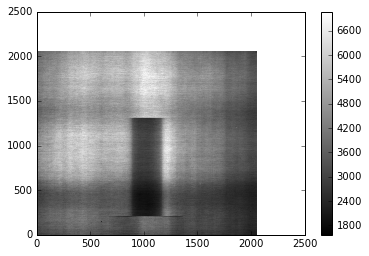

In [18]:
plt.pcolormesh(ave, cmap="gray")
plt.colorbar()

** We can define the ROI as xmin=600, ymin=100, xmax=1500, ymax=1500 **

## 4. Run reconstruction

In [29]:
ct.recon(crop_window=(600, 100, 1500, 1500))

** Check output **

In [25]:
!ls {outdir} -l |sed -n "1,6p"
!ls {outdir} -l |wc -l

total 4443972
-rw-r--r-- 1 lj7 users 3247472 Aug 24 19:52 recon_0.tiff
-rw-r--r-- 1 lj7 users 3247472 Aug 24 19:52 recon_1000.tiff
-rw-r--r-- 1 lj7 users 3247472 Aug 24 19:52 recon_1001.tiff
-rw-r--r-- 1 lj7 users 3247472 Aug 24 19:52 recon_1002.tiff
-rw-r--r-- 1 lj7 users 3247472 Aug 24 19:52 recon_1003.tiff
1402
